In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


# Load csv data
df = pd.read_csv('/Users/lenovo1/Downloads/marketing_customer_analysis.csv')

# Preview data
display(df.head())

# Describe data
display(df.describe())

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/203094364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


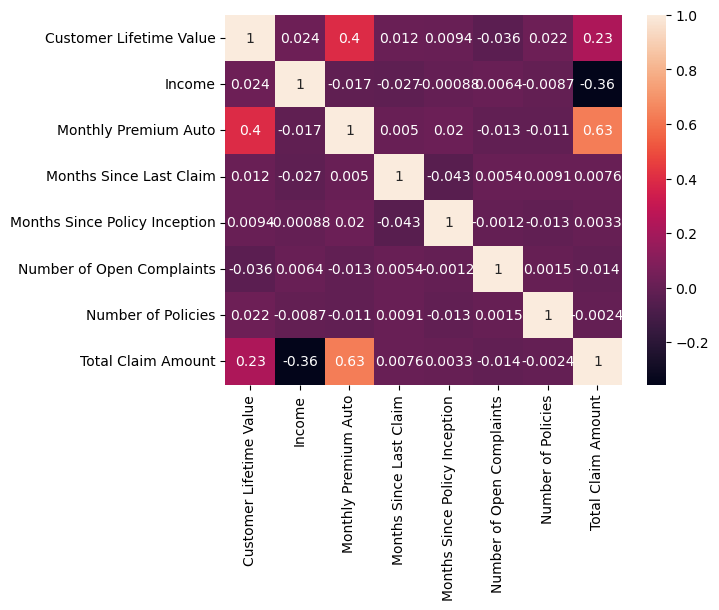

The numerical columns selected will be Monthly Premium Auto, Income and Customer Lifetime Value, because these are the columns that have the highest correlation with Total Claim Amount and doesn't suffer from multicollinearity (neither Monthly Premium Auto nor Customer Lifetime Value will be dropped, as 0.4 isn't generally considered a sufficiently high correlation coefficient that indicates the presence of multicollinearity). The other numerical columns have a too low correlation with Total Claim Amount. 


In [2]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
print("The numerical columns selected will be Monthly Premium Auto, Income and Customer Lifetime Value, because these are the columns that have the highest correlation with Total Claim Amount and doesn't suffer from multicollinearity (neither Monthly Premium Auto nor Customer Lifetime Value will be dropped, as 0.4 isn't generally considered a sufficiently high correlation coefficient that indicates the presence of multicollinearity). The other numerical columns have a too low correlation with Total Claim Amount. ")

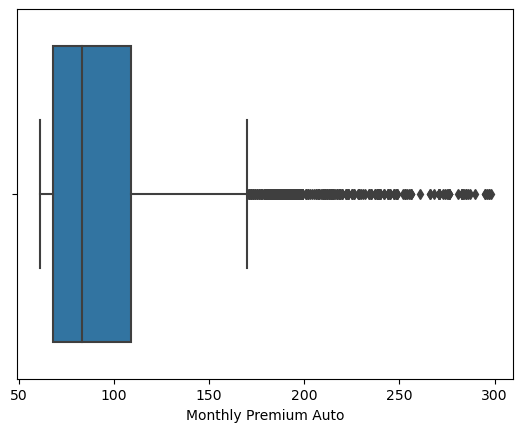

In [3]:
sns.boxplot(x=df['Monthly Premium Auto'])
plt.show()

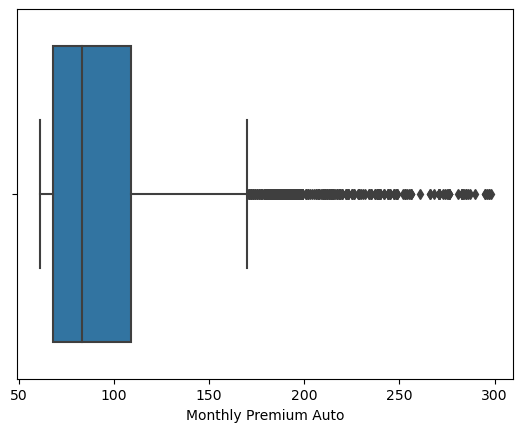

In [4]:
iqr = np.percentile(df['Monthly Premium Auto'],75) - np.percentile(
    df['Monthly Premium Auto'],25)
upper_wisker = np.percentile(df['Monthly Premium Auto'],75) + 1.5*iqr
lower_wisker = np.percentile(df['Monthly Premium Auto'],25) - 1.5*iqr
marketing_customer_analysis = df[(df['Monthly Premium Auto']>lower_wisker) & 
                                 (df['Monthly Premium Auto']<upper_wisker)]
sns.boxplot(x=df['Monthly Premium Auto'])
plt.show()

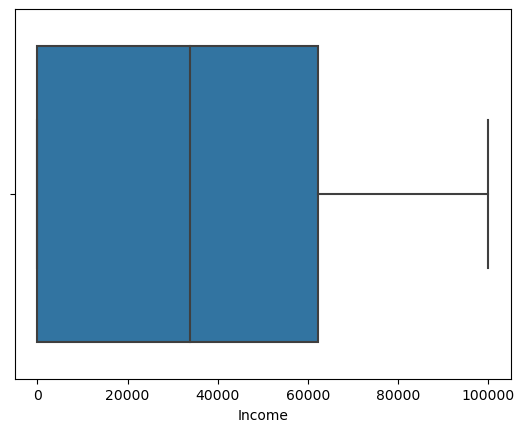

In [5]:
sns.boxplot(x=df['Income'])
plt.show()

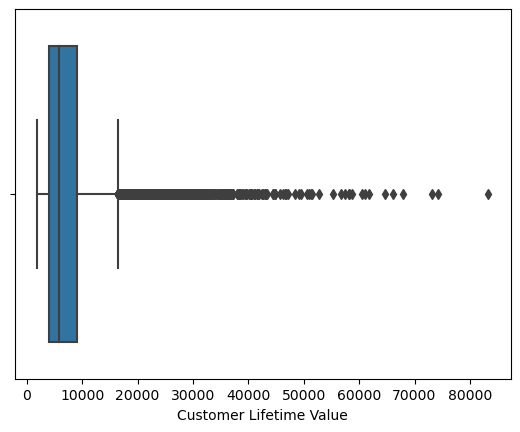

In [6]:
sns.boxplot(x=df['Customer Lifetime Value'])
plt.show()

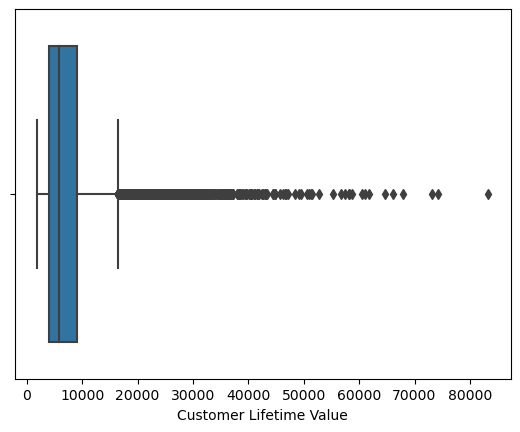

In [7]:
iqr = np.percentile(df['Customer Lifetime Value'],75) - np.percentile(
    df['Customer Lifetime Value'],25)
upper_wisker = np.percentile(df['Customer Lifetime Value'],75) + 1.5*iqr
lower_wisker = np.percentile(df['Customer Lifetime Value'],25) - 1.5*iqr
marketing_customer_analysis = df[(df['Customer Lifetime Value']>lower_wisker) 
                               & (df['Customer Lifetime Value']<upper_wisker)]
sns.boxplot(x=df['Customer Lifetime Value'])
plt.show()

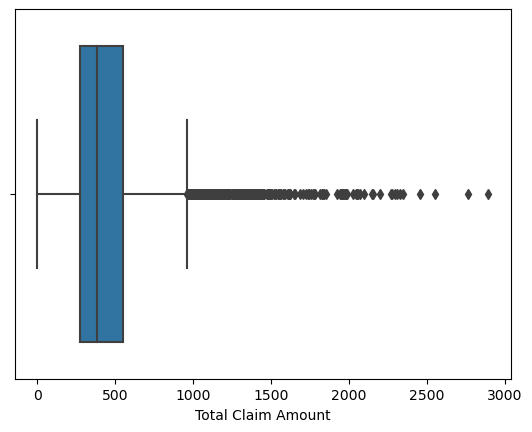

In [8]:
sns.boxplot(x=df['Total Claim Amount'])
plt.show()

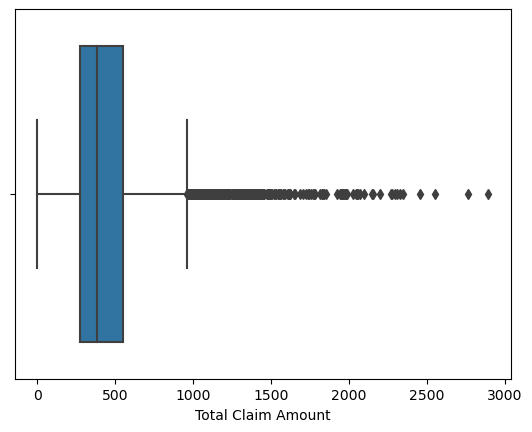

In [9]:
iqr = np.percentile(df['Total Claim Amount'],75) - np.percentile(
    df['Total Claim Amount'],25)
upper_wisker = np.percentile(df['Total Claim Amount'],75) + 1.5*iqr
lower_wisker = np.percentile(df['Total Claim Amount'],25) - 1.5*iqr
marketing_customer_analysis = df[(df['Total Claim Amount']>lower_wisker) & 
                                 (df['Total Claim Amount']<upper_wisker)]
sns.boxplot(x=df['Total Claim Amount'])
plt.show()

In [10]:
# X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
y = df['Total Claim Amount']
X = df.drop(['Total Claim Amount', 'Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies'], axis=1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

print("The previous step already returns Pandas DataFrames.")
X_train

The previous step already returns Pandas DataFrames.


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,YQ79307,Washington,4768.955924,No,Basic,Bachelor,1/10/11,Employed,M,51144,Urban,Married,61,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
1,CY49953,Oregon,2827.559570,No,Extended,College,2/18/11,Unemployed,F,0,Suburban,Single,79,Special Auto,Special L2,Offer3,Branch,Four-Door Car,Medsize
2,XN16891,Arizona,2912.892035,No,Basic,College,2/28/11,Employed,M,81097,Suburban,Divorced,74,Personal Auto,Personal L1,Offer4,Agent,Four-Door Car,Small
3,EP64069,California,5138.244998,No,Basic,Bachelor,1/8/11,Employed,F,72264,Urban,Married,64,Corporate Auto,Corporate L3,Offer3,Web,Four-Door Car,Medsize
4,IW77519,Washington,2610.369217,No,Basic,Bachelor,1/18/11,Employed,F,54737,Suburban,Single,66,Personal Auto,Personal L3,Offer3,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,FX81675,California,7334.328083,No,Basic,College,1/29/11,Employed,F,87957,Suburban,Divorced,61,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Small
7303,ZU30804,California,5498.940679,Yes,Basic,College,2/5/11,Medical Leave,M,22520,Suburban,Married,73,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Medsize
7304,LA53648,California,8992.779137,No,Extended,High School or Below,1/27/11,Unemployed,F,0,Suburban,Single,129,Personal Auto,Personal L1,Offer1,Call Center,SUV,Medsize
7305,IS30295,Arizona,14635.451580,Yes,Extended,Bachelor,2/27/11,Unemployed,F,0,Suburban,Divorced,139,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize


In [12]:
X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = object)

X_num_test = X_test.select_dtypes(include = np.number)
X_cat_test = X_test.select_dtypes(include = object)

In [13]:
# If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only 
# in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()
display(X_num_train.skew())
print("There is no need to transform the columns because their skewness is inside the range [-2,2].")

Customer Lifetime Value    2.956276
Income                     0.297376
Monthly Premium Auto       2.081907
dtype: float64

There is no need to transform the columns because their skewness is inside the range [-2,2].


In [14]:
display(X_num_train.describe())
print("The ranges of the columns are very different, so a scaler needs to be applied.")

,Customer Lifetime Value,Income,Monthly Premium Auto
count,7307.000000,7307.000000,7307.000000
mean,8022.789394,37517.762556,93.562748
std,6791.672803,30192.253906,34.679436
min,1898.007675,0.000000,61.000000
25%,4061.273191,0.000000,68.000000
50%,5821.787383,33806.000000,83.000000
75%,9007.014951,61796.000000,109.000000
max,83325.381190,99981.000000,298.000000


The ranges of the columns are very different, so a scaler needs to be applied.


In [15]:
scaler = MinMaxScaler()

scaler.fit(X_num_train) # fit() Determine the min and the max of each column in the TRAIN set

# Save all your transformers/scalers right after the .fit() using pickle using the code shown below:

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file) # Replace "variable" with the name of the variable that contains your transformer

X_num_train_scaled = scaler.transform(X_num_train) # .transform() applies the transformation x_normalized will be np.array
X_num_test_scaled  = scaler.transform(X_num_test) # .transform() applies the transformation x_normalized will be np.array

In [16]:
X_num_train_scaled_df = pd.DataFrame(X_num_train_scaled, columns=X_num_train.columns)
X_num_test_scaled_df  = pd.DataFrame
X_num_train_scaled_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto
0,0.035258,0.511537,0.000000
1,0.011416,0.000000,0.075949
2,0.012464,0.811124,0.054852
3,0.039793,0.722777,0.012658
4,0.008748,0.547474,0.021097


In [17]:
X_cat_train = X_cat_train.drop(['Customer','Effective To Date'], axis=1)
X_cat_test = X_cat_test.drop(['Customer','Effective To Date'], axis=1)

X_cat_train_nominal = X_cat_train.drop(['Coverage','Education','Vehicle Size'], axis=1)
X_cat_test_nominal = X_cat_test.drop(['Coverage','Education','Vehicle Size'], axis=1)

X_cat_train_ordinal = X_cat_train[['Coverage','Education','Vehicle Size']]
X_cat_test_ordinal = X_cat_test[['Coverage','Education','Vehicle Size']]

In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop='if_binary', sparse=False)

one_hot_encoder.fit(X_cat_train_nominal)

path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "one_hot_encoder.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path + filename, "wb") as file:
    pickle.dump(one_hot_encoder, file) # Replace "variable" with the name of the variable that contains your transformer

X_cat_train_nom_encoded = one_hot_encoder.transform(X_cat_train_nominal)
X_cat_test_nom_encoded = one_hot_encoder.transform(X_cat_test_nominal)

X_cat_train_nom_encoded_df = pd.DataFrame(X_cat_train_nom_encoded, 
                                          columns=one_hot_encoder.get_feature_names_out(X_cat_train_nominal.columns))
X_cat_test_nom_encoded_df = pd.DataFrame(X_cat_test_nom_encoded, 
                                         columns=one_hot_encoder.get_feature_names_out(X_cat_test_nominal.columns))


/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X_cat_train_ordinal['Coverage'].value_counts()

Basic       4464
Extended    2175
Premium      668
Name: Coverage, dtype: int64

In [20]:
X_cat_train_ordinal['Coverage'] = X_cat_train_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
X_cat_test_ordinal['Coverage'] = X_cat_test_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
X_cat_train_ordinal['Coverage'].value_counts()

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/3745003359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Coverage'] = X_cat_train_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/3745003359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Coverage'] = X_cat_test_ordinal['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium':2})


0    4464
1    2175
2     668
Name: Coverage, dtype: int64

In [21]:
X_cat_train_ordinal['Education'].value_counts()

Bachelor                2188
College                 2158
High School or Below    2101
Master                   573
Doctor                   287
Name: Education, dtype: int64

In [22]:
X_cat_train_ordinal['Education'] = X_cat_train_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1, 
                                                                             'College':2, 'Master':3, 'Doctor':4})
X_cat_test_ordinal['Education'] = X_cat_test_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1, 
                                                                             'College':2, 'Master':3, 'Doctor':4})
X_cat_train_ordinal['Education'].value_counts()

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/3183255063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Education'] = X_cat_train_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1,
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/3183255063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Education'] = X_cat_test_ordinal['Education'].replace({'High School or Below':0, 'Bachelor':1,


1    2188
2    2158
0    2101
3     573
4     287
Name: Education, dtype: int64

In [23]:
X_cat_train_ordinal['Vehicle Size'].value_counts()

Medsize    5164
Small      1389
Large       754
Name: Vehicle Size, dtype: int64

In [24]:
X_cat_train_ordinal['Vehicle Size'] = X_cat_train_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
X_cat_test_ordinal['Vehicle Size'] = X_cat_test_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
X_cat_train_ordinal['Vehicle Size'].value_counts()

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/2945261137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_train_ordinal['Vehicle Size'] = X_cat_train_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_41904/2945261137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_test_ordinal['Vehicle Size'] = X_cat_test_ordinal['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})


1    5164
0    1389
2     754
Name: Vehicle Size, dtype: int64

In [25]:
X_cat_train_transformed = pd.concat([X_cat_train_nom_encoded_df, X_cat_train_ordinal], axis=1)
X_cat_train_transformed

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0
7303,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,1
7304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1
7305,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1


In [26]:
X_train_transformed = pd.concat([X_num_train_scaled_df, X_cat_train_transformed], axis=1)
X_train_transformed

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.035258,0.511537,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
1,0.011416,0.000000,0.075949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,1
2,0.012464,0.811124,0.054852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0
3,0.039793,0.722777,0.012658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,0.008748,0.547474,0.021097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.066763,0.879737,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0
7303,0.044223,0.225243,0.050633,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,1
7304,0.087130,0.000000,0.286920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1
7305,0.156427,0.000000,0.329114,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1


In [27]:
X_cat_test_transformed = pd.concat([X_cat_test_nom_encoded_df, X_cat_test_ordinal], axis=1)
X_cat_test_transformed

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1823,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2
1824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1
1825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_test_scaled = scaler.fit_transform(X_num_test)  # Make sure X_num_test contains numerical data
X_num_test_scaled_df = pd.DataFrame(X_num_test_scaled, columns=X_num_test.columns)
print(type(X_num_test))            # Should be pandas DataFrame
print(type(X_num_test_scaled_df))  # Should be pandas DataFrame


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
X_test_transformed = pd.concat([X_num_test_scaled_df, X_cat_test_transformed], axis=1)
X_test_transformed


,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,EmploymentStatus_Disabled,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,Education,Vehicle Size
0,-0.516923,1.168950,0.425505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
1,-0.336991,-0.482046,-0.626657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
2,-0.574663,1.821995,0.064764,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,0
3,-0.002609,1.251489,0.215072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,1
4,-0.000255,-0.464336,-0.686781,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.105198,0.671179,0.545752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,1
1823,-0.043179,1.018369,-0.837089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2
1824,-0.455943,1.659071,0.726123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1
1825,-0.814086,-1.228300,-0.867151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [30]:
#from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler2 = MinMaxScaler()

scaler2.fit(X_train_transformed) # fit() Determine the min and the max of each column in the TRAIN set

path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler2.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(scaler2, file) # Replace "variable" with the name of the variable that contains your transformer

X_train_scaled = scaler2.transform(X_train_transformed) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler2.transform(X_test_transformed)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transformed.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_transformed.columns)

In [31]:
#from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "models/"
    # Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
      # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_model.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer
        
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred  = linear_model.predict(X_test_scaled_df)

results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,223.305224,196.0
1,Train,568.800000,566.0
2,Train,355.200000,390.0
3,Train,272.649844,184.0
4,Train,391.970334,432.0


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean absolute error
MAE_train = mean_absolute_error(results_df[results_df["Set"]=="Train"]["Real"], 
                                results_df[results_df["Set"]=="Train"]["Predicted"])
MAE_test  = mean_absolute_error(results_df[results_df["Set"]=="Test"]["Real"],  
                                results_df[results_df["Set"]=="Test"]["Predicted"])

# Mean squared error
MSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], 
                               results_df[results_df["Set"]=="Train"]["Predicted"])
MSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  
                               results_df[results_df["Set"]=="Test"]["Predicted"])

# Root mean squared error
RMSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], 
                                results_df[results_df["Set"]=="Train"]["Predicted"], squared=False)
RMSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  
                                results_df[results_df["Set"]=="Test"]["Predicted"], squared=False)

# R2
R2_train = r2_score(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])

# For R2 on the test set, provide the true and predicted values as separate arguments
R2_test = r2_score(results_df[results_df["Set"]=="Test"]["Real"], results_df[results_df["Set"]=="Test"]["Predicted"])



In [33]:
metrics = {"Metric": ['MAE','MSE','RMSE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

metrics_df = pd.DataFrame(metrics).round(2)
metrics_df

,Metric,Train,Test
0,MAE,95.37,811.90
1,MSE,19412.18,1171937.01
2,RMSE,139.33,1082.56
3,R2,0.77,-13.74
